In [1]:
from __future__ import division
from __future__ import print_function

import os

from myhdl import *
from myhdl_tools import vcd

from test_01_mex import test

## MyHDL Function (module)
In [this tutorial](http://www.fpgarelated.com/showarticle/25.php) a small example is presented towards the begining of the post and a MyHDL anatomy pictural (see below) is used to describe the parts of a MyHDL module.  Note, the nomenclature is a little odd here, in Python a module is a file and in MyHDL a module (typically) is a Python function that describes a set of hardware behavior.  Module is commonly used to name an HDL component in a digital circuit - the use has been propgated forward.

<center><figure>
<a href="https://www.flickr.com/photos/79765478@N08/14230879911" title="myhdl_module_anatomy by cfelton*, on Flickr"><img src="https://farm3.staticflickr.com/2932/14230879911_03ce54dcde_z.jpg" width="640" height="322" alt="myhdl_module_anatomy"></a>
<caption> MyHDL Module Anatomy </caption>
</figure></center>

# A Shift Register
<!-- there is an assumption the user will know what a shift register is, these exercises are for peopel that know Verilog/VHDL.  Not teaching digital logic from scratch !! -->
What exactly does a shift register do?  In the exercise description section there is a link to a short video describing a shift register.  But to generate one all we really need is a description of what the expected behavior is.  In this case we have a parallel value, *ival* that will be serialized to a single bit, the following shows the temporal behavior.  If we have an contrained integer with a maximum value of 256, the following will be the behavior:
   
    Time | load | ival (d) | ival (b)  | obit
    -----+------+----------+-----------+-----
    T0   | 1    |  32      | 0000_0000 | 0
    T1   | 0    |  X       | 0010_0000 | 0
    T2   | 0    |  X       | 0100_0000 | 0
    T3   | 0    |  X       | 1000_0000 | 1
    T4   | 0    |  X       | 0000_0001 | 0
    T5   | 0    |  X       | 0000_0010 | 0

## Exercise Description
This exercise is to implement the shift register shown with the following additions:

1.  Make the shift register circular
2.  Add an inital condition parameter, *inital*

To make the the [shift register]()(YouTube) circular connect the most-significant-bit (msb) to the least-significant-bit (lsb).

Sections from the MyHDL manual that may be useful:

1. [Bit indexing and slicing](http://docs.myhdl.org/en/latest/manual/hwtypes.html#bit-indexing)
2. [Signals]()
3. [The concat function](http://docs.myhdl.org/en/latest/manual/reference.html?highlight=concat#myhdl.concat) 

Fill in the body of the following and then run the test cell.

### Hints

1.  An internal signal will be used to represent the shift register.  The width (max value) of the register 

In [2]:
def m_shifty(clock, reset, load, lval, obit, ival=0):
    """
       load:input: load strobe, load the ival
       lval:input: the value to be loaded
       obit:output: The most significant 
       ival: initial value
    """
    y = Signal(intbv(ival, min=lval.min, max=lval.max))
    mask = y.max-1
    
    # non working template
    @always_seq(clock.posedge, reset=reset)
    def rtl():
        obit.next = y[0]
        
    # for monitoring, access outside this function
    m_shifty.y = y
    
    return rtl
    
    
    

After the above has been coded run the next cell to test.  If the test fails it will print out the last five clock cycles and some values.  The VCD file can be displayed below (very basic waveforms) for debug.

In [3]:
test(m_shifty)

Start
Last five clock cycles
 time    | load | lval  | obit | 
      -1 |    0 | 0000 | 0 | 0000
      -1 |    0 | 0000 | 0 | 0000
      -1 |    0 | 0000 | 0 | 0000
      15 |    0 | 0000 | 1 | 0089

End


** ToVHDLWarning: Port is not used: load
** ToVHDLWarning: Port is not used: lval
** ToVHDLWarning: Signal is not driven: y
** ToVerilogWarning: Port is not used: load
** ToVerilogWarning: Port is not used: lval
** ToVerilogWarning: Signal is not driven: y


(<matplotlib.figure.Figure at 0x2d862d0>,
 <matplotlib.axes.AxesSubplot at 0x2d86350>)

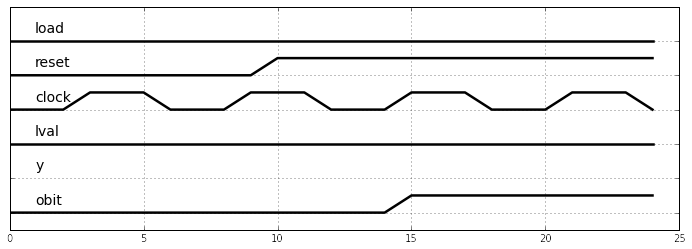

In [5]:
vcd.parse_and_plot('vcd/01_mex.vcd')

## More Nomenclature


In [ ]:
# View the generated VHDL
%less m_shifty.vhd

In [ ]:
# View the generated Verilog
%less m_shifty.v